## Ejercicio para recordar a los caminantes 

Usando el código de la última clase haz lo siguiente:

1. Crear un caminante aleatorio en 2D (o 3D)
2. Graficar al caminante aleatorio

In [1]:
function caminando3D(t,x_inicial=0,y_inicial= 0 ,z_inicial = 0)
    x = x_inicial
    y = y_inicial
    z = z_inicial
    xes = Int64[]
    yes = Int64[]
    zes = Int64[]
      for i in 1:t    
        push!(xes,x)
        δ = rand([-1,1])
        x += δ
        
        push!(yes,y)
        δ = rand([-1,1])
        y += δ
        
        push!(zes,z)
        δ = rand([-1,1])
        z += δ     
    end
    return xes,yes,zes
end

caminando3D (generic function with 4 methods)

Creamos el arreglo `posiciones` en donde guardaremos. La

In [4]:
tiempo = 100
x_i, y_i, z_i = 0, 0, 10

posiciones = caminando3D(tiempo,x_i,y_i,z_i)


([0, 1, 0, 1, 0, 1, 0, -1, -2, -1  …  -20, -19, -20, -19, -18, -17, -18, -19, -18, -17], [0, 1, 0, 1, 0, 1, 0, -1, 0, -1  …  8, 7, 8, 9, 10, 11, 10, 11, 12, 13], [10, 9, 8, 9, 8, 9, 10, 9, 10, 11  …  10, 11, 12, 11, 10, 11, 10, 11, 10, 11])

### 2 Visualizamos nuestro caminante usando `plotlys()`

In [5]:
using Plots


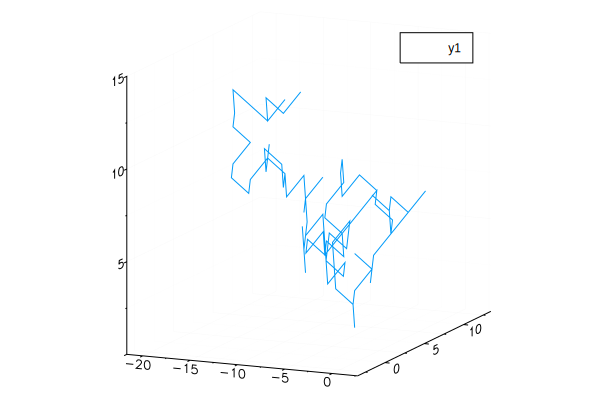

In [10]:
gr()
plot(posiciones)

### 3 Dibujamos muchos caminantes

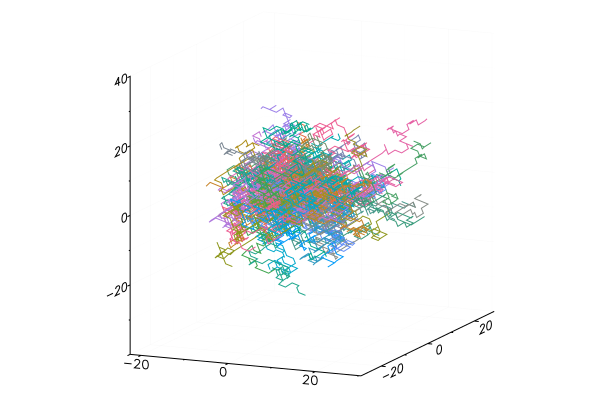

In [12]:
num_pasos = 100
num_caminantes = 100
posiciones = caminando3D(num_pasos)
p = plot(posiciones,leg=false)             #### Guardamos la gráfica en una variable, para poderla modificar
for i in 1:num_caminantes
    posiciones = caminando3D(num_pasos)
    plot!(posiciones,leg=false)
end
                        
display(p)                               #### Necesitamos mostrar la variableaa

Nos podemos plantear las siguientes preguntas:

1. **¿Cuál es el radio de la bola que contiene una parte representativa de la gráfica?** = **¿varianza?**
2. **¿Posición promedio de las partícula?**
3. **¿A qué radio es más probable que encontremos una partícula?**

# Análisis estadístico de caminatas aleatorias

Una tarea fundamental en la física es el análisis de datos. A menudo, un experimento produce una cierta cantidad de datos correspondientes a la medición de ciertas cantidades. Se repite una medición varias veces para asegurar que sea reproducible, y luego se llevan a cabo análisis de estos datos.

Podemos llevar a cabo el mismo proceso con los datos provenientes de un **experimento numérico**, o sea, una simulación.

Retomemos nuestra simulación de caminatas aleatorias del notebook anterior y recordemos algo de estadística para poder caracterizar a las caminatas (y para finalmente entender la estadística...).

### Ejercicio

(i) Escribe una función `caminatas` para simular la dinámica de $N$ caminatas aleatorias para un tiempo total $T$. Sigue los pasos siguientes.

1. Crea un vector llamado `xs` de enteros ceros de longitud $N$ con la función zeros. En este arreglo guardaremos las posiciones del $x_i$ correspondiente al *i-ésimo* caminante aleatorio [Pista: Utiliza ?zeros para ver la documentación de la función.]
2. Haz una función `paso!` que acepte un arreglo con las posiciones de los caminantes y lleva a cabo un paso de todos los caminantes. Prueba si funciona con el vector `xs`.[Pista: La función length nos dice cuántos elementos contiene un Vector.]
3. Haz la función `caminatas`, la cual tomará como argumentos el *número de caminantes*, *número de pasos*. La función regresa todos los datos en un arreglo.  [Tendrás que utilizar la función copy para copiar **arreglos**. (¿Qué ocurre si no lo haces?)] 

## 1 
Probamos para una `N` en particular.

In [17]:
N = 10
xs = zeros(Int32,N)

10-element Array{Int32,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

## 2

Creamos nuestra función.

In [18]:
function paso!(xs)
    for i in 1:length(xs)
        δ=rand([-1,1])
        xs[i] += δ
    end
    return xs
end


paso! (generic function with 1 method)

In [19]:
paso!(xs)

10-element Array{Int32,1}:
 -1
  1
 -1
  1
 -1
 -1
 -1
  1
  1
 -1

In [20]:
xs

10-element Array{Int32,1}:
 -1
  1
 -1
  1
 -1
 -1
 -1
  1
  1
 -1

Hace lo que queremos. *Modifica el arreglo original.*

## 3

Ahora creamos la función que hará caminar a cada uno de los caminantes

In [21]:
function caminatas(num_caminantes,num_pasos)
    posiciones = zeros(Int32,num_caminantes,num_pasos)
    
    for i in 1:num_pasos-1
        posiciones[:,i+1]=copy(paso!(posiciones[:,i]))    #### Aquí usamos COPY. ¿POR QUÉ?
        
    end
    return posiciones
end

caminatas (generic function with 1 method)

(ii) Simula 1000 caminantes para un tiempo 100 y capta los datos en una variable.

In [24]:
num_caminantes = 1000
num_pasos = 100
pasos = caminatas(num_caminantes,num_pasos)

1000×100 Array{Int32,2}:
 0   1   0   1   0  -1  -2  -3  -4  -5  …   -7   -6   -5   -4   -5   -4   -3
 0  -1   0  -1   0   1   0  -1   0  -1      -9   -8   -9   -8   -9   -8   -7
 0  -1   0   1   0   1   2   1   2   3       1    2    3    2    3    4    5
 0  -1   0  -1  -2  -1   0  -1  -2  -3      -9  -10  -11  -10  -11  -10  -11
 0  -1  -2  -3  -2  -3  -2  -1  -2  -1      15   16   15   16   15   16   17
 0  -1   0  -1  -2  -1  -2  -3  -2  -1  …    7    6    7    8    7    6    7
 0  -1  -2  -1  -2  -3  -2  -1   0   1      13   14   13   14   13   12   13
 0   1   2   3   2   3   2   3   4   5       3    2    3    4    5    4    3
 0   1   0   1   2   3   2   1   0   1      -1    0   -1   -2   -1   -2   -3
 0   1   2   3   4   3   4   5   6   5       7    6    7    8    9    8    7
 0   1   2   3   4   3   4   5   6   5  …   -7   -6   -7   -8   -7   -6   -5
 0   1   2   1   0  -1   0   1   2   1      25   24   25   26   25   24   23
 0  -1  -2  -1   0   1   0   1   2   1       3    2

¿Cómo sabemos que lo hicimos bien? **Graficando**

Vamos a graficar un caminante

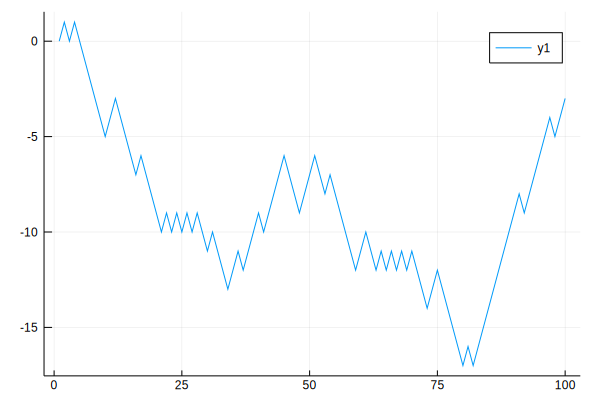

In [27]:
plot(pasos[1,:])

Graficamos todos

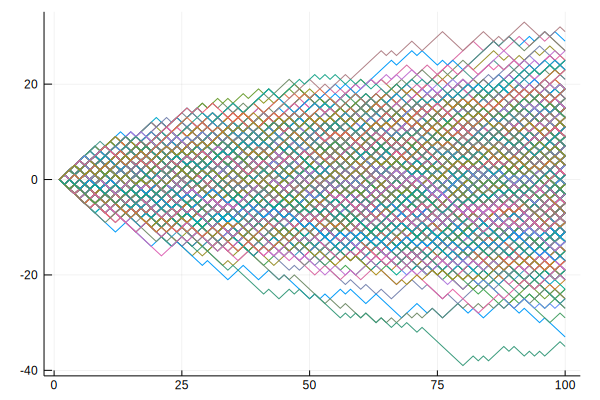

In [28]:
p = plot(pasos[1,:],leg=false)
for i in 2:num_caminantes
    plot!(pasos[i,:],leg=false)
end
display(p)

Recapitulando...

Hemos creado tres funciones con las cuales vamos a poder crear fácilmente un conjunto de caminantes aleatorios.


In [1]:
### Esta función mueve un paso a cada elemento del arreglo xs

function paso!(xs)   #### xs es un arreglo unidimensionar == vector
    for i in 1:length(xs)
        δ=rand([-1,1])
        xs[i] += δ
    end
    return xs
end
#### Genera una matriz de num_caminantes X num_pasos
function caminatas(num_caminantes,num_pasos)
    posiciones = zeros(Int32,num_caminantes,num_pasos)
    
    for i in 1:num_pasos-1
        posiciones[:,i+1]=copy(paso!(posiciones[:,i]))    #### Aquí usamos COPY. ¿POR QUÉ?
        
    end
    return posiciones
end

num_caminantes = 1000
num_pasos = 100
pasos = caminatas(num_caminantes,num_pasos)

1000×100 Array{Int32,2}:
 0   1   0   1   2   1   0  -1  -2  -1  …    3    4    3    2    1    2    1
 0   1   2   3   2   3   2   1   2   3       7    8    7    6    5    6    7
 0   1   0  -1  -2  -1   0   1   0  -1       5    6    5    6    7    8    7
 0  -1  -2  -1   0   1   2   1   2   3      -1   -2   -3   -2   -3   -2   -1
 0  -1  -2  -1  -2  -3  -4  -3  -4  -3       9    8    7    6    7    6    7
 0  -1   0   1   0  -1   0  -1   0   1  …   -7   -6   -5   -6   -7   -6   -5
 0   1   0   1   0  -1  -2  -3  -4  -3      -9  -10  -11  -12  -13  -14  -13
 0   1   0  -1   0   1   0   1   2   1      11   10   11   12   13   14   15
 0  -1  -2  -1  -2  -3  -4  -5  -6  -5      -1    0   -1    0    1    2    3
 0   1   2   1   0   1   2   3   4   5       9    8    9    8    9   10    9
 0   1   2   1   2   1   0  -1  -2  -1  …  -11  -10  -11  -10  -11  -12  -13
 0   1   2   1   2   3   2   3   4   3       3    4    5    6    5    6    5
 0  -1  -2  -3  -4  -5  -6  -5  -4  -3       7    8

Las columnas corresponden a la posición de los caminantes en cierto paso. **Son las $x_i(t)$.**

In [8]:
pasos[:,100]

1000-element Array{Int32,1}:
   1
   7
   7
  -1
   7
  -5
 -13
  15
   3
   9
 -13
   5
   7
   ⋮
  11
   5
 -15
  11
   5
 -11
   9
   3
  -1
  -5
 -21
   9

## Promedios

Si queremos hacer estadística lo primero que tenemos que hacer es calcular promedios.

### Ejercicios
    
(i) Si simulas $N$ caminatas aleatorias $x_i(t)$, con $i=1, \ldots, N$, para un tiempo total (número de pasos) $T$, ¿cómo esperas salga el promedio de todos los $x_i(t)$ con un tiempo $t$ fijo?

1. Escribe una función `promedio_vector` que calcule el promedio de un vector. Acepta el vector `v` como argumento y regresa el promedio.

2. Escribe una función que calculé los promedios de $x_i(t)$ para cada $t$.

3. Calcula los promedios de 1000 caminantes por un tiempo 100.

4. Dibuja el promedio como función del tiempo. ¿Es lo que esperabas?

## 1

In [9]:
function promedio_vector(vector)
    suma = 0
    for i in 1:length(vector)
        suma += vector[i]
    end
    return suma/length(vector)
end

promedio_vector (generic function with 1 method)

Veamos si nuestra función tiene sentido. 
¿Cuál es valor promedio de mil números distribuidos aleatoriamente en el intervalo $[0,1]$?

In [10]:
promedio_vector(rand(1000))

0.48659037322587273

## 2
Esta función acepta un arreglo de dos dimensiones

In [11]:
function promedios(arreglo)
    promedios_temporales = Float64[]
    for i in 1:length(arreglo[1,:])
        prom_t=promedio_vector(arreglo[:,i])
        push!(promedios_temporales,prom_t)
    end
    return promedios_temporales
end

promedios (generic function with 1 method)

¿Hace lo que queremos?

In [14]:
prom_temporales = promedios(pasos)

100-element Array{Float64,1}:
  0.0  
  0.006
 -0.032
 -0.038
 -0.062
 -0.016
 -0.022
 -0.05 
 -0.076
 -0.05 
 -0.058
 -0.056
 -0.064
  ⋮    
 -0.426
 -0.454
 -0.464
 -0.434
 -0.44 
 -0.436
 -0.424
 -0.42 
 -0.432
 -0.49 
 -0.55 
 -0.524

¿Es lo que esperabas? ¿Qué pasa si los caminantes dieran más pasos? ¿El promedio aumenta con el número de pasos?

In [13]:
using Plots
gr()

┌ Info: Recompiling stale cache file /home/mvb/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


Plots.GRBackend()

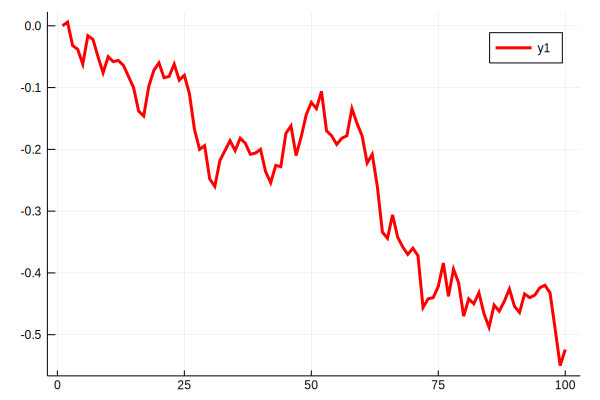

In [21]:
p = plot(prom_temporales, c=:red, lw= 3)

In [22]:
for i in 1:num_caminantes
    plot!(pasos[i,:])
end
display(p)

## Varianza

Según [Wikipedia](https://es.wikipedia.org/wiki/Varianza) la varianza se define como 
$$\sigma_n^2 = \frac{1}{n} \sum_{i=1}^n (x_i-\bar{ X})^2,$$
donde $\bar X$ es el promedio de los $n$ datos $x_i$.

### Ejercicio

(i) Escribe una función que calcule la varianza de un vector

(ii) Escribe una función que calcule las varianzas de las $x_i(t)$ para una $t$ dada.

(iii) Dibuja la varianza como función del tiempo. Repite el cálculo varias veces y dibuja las distintas curvas en una sola gráfica. ¿Qué observas? ¿Cómo crece la varianza?


In [27]:
function var_vector(vector)
    prom = promedio_vector(vector)
    σ_cuad = 0
    n = length(vector)
    for i in 1:n
        σ_cuad += (1/n)*(prom-vector[i])^2
    end
    return sqrt(σ_cuad)
    
end

var_vector (generic function with 1 method)

In [36]:
var_vector(rand(1000))

0.28941337843713844

In [39]:
#function promedios(arreglo)
 #   promedios_temporales = Float64[]
#    for i in 1:length(arreglo[1,:])
    #    prom_t=promedio_vector(arreglo[:,i])
   #     push!(promedios_temporales,prom_t)
  #  end
 #   return promedios_temporales
#end

function varianzas(arreglo)
    varianza_temporal = Float64[]
    for i in 1:length(arreglo[1,:])
        var_t = var_vector(arreglo[:,i])
        push!(varianza_temporal,var_t)
    end
    return varianza_temporal
end
    

varianzas (generic function with 1 method)

In [40]:
varianzas_temp = varianzas(pasos)

100-element Array{Float64,1}:
 0.0               
 0.9999819998379933
 1.391034147675745 
 1.7316339105018652
 2.027845161741903 
 2.2467184959402515
 2.461608417275185 
 2.678339037538001 
 2.8499515785360345
 3.0498360611678836
 3.2472505292939893
 3.3652435275920163
 3.4865318010882898
 ⋮                 
 9.245026987521454 
 9.297842975658403 
 9.337703357892678 
 9.3703598650212   
 9.425836832875943 
 9.435777869365083 
 9.476931148847715 
 9.461479799693079 
 9.516163933014186 
 9.589989572465669 
 9.646009537627485 
 9.703887056226508 

In [42]:
plot!(varianzas_temp,c=:black, lw=3)

[Wikipedia nos dice][1] 
> La convergencia de un caminante aleatorio nos dice que la posición de un caminante después de un número de pasos grande sigue una distribución normal de varianza:

> $$\sigma ^{2}={\frac {t}{\delta t}}\,\varepsilon ^{2}$$

> donde $t$ es el tiempo transcurrido $\delta t$ es el tiempo transcurrido de cada paso y $\varepsilon$ es el tamaño del paso. 

[1]: https://en.wikipedia.org/wiki/Random_walk

### Ejercicio

Cuenten cuántos caminantes tienen una distancia mayor que la varianza al tiempo dado. ¿Es cierto que solamente es el 30% de los caminantes?

## Densidad de Probabilidad


El promedio y la varianza son medidas burdas que caracterizan a una colección de datos. Una medida más refinada es la **distribución de probabilidad**. Una forma de caracterizarla es a través de un **histograma**, que nos proporciona la densidad de probabilidad o densidad de masa.

(i) ¿Qué es lo que mide un histograma?

(ii) Haga un histogramas de las posiciones de los caminantes $x_i(t)$ para una $t$ arbitraria


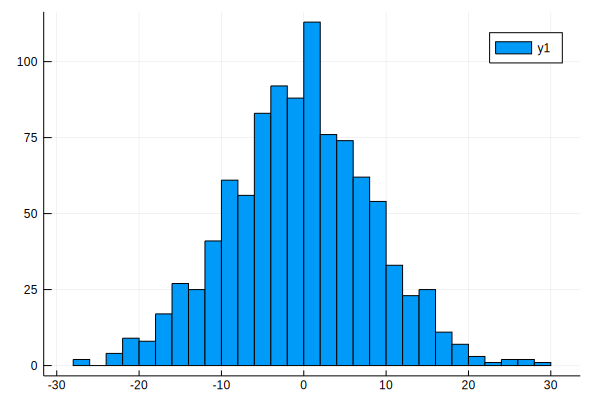

In [46]:
histogram(pasos[:,80])

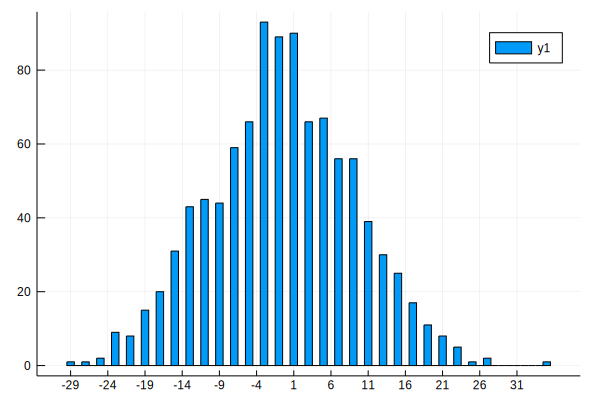

In [51]:
t = 100
cajas = collect((minimum(pasos[:,t])-.5):maximum(pasos[:,t])+.5)
histogram(pasos[:,t], bins = cajas, xticks=minimum(pasos[:,t]):5:maximum(pasos[:,t]))

Los valores de las cajas están medios raros. Vamos a componerlos

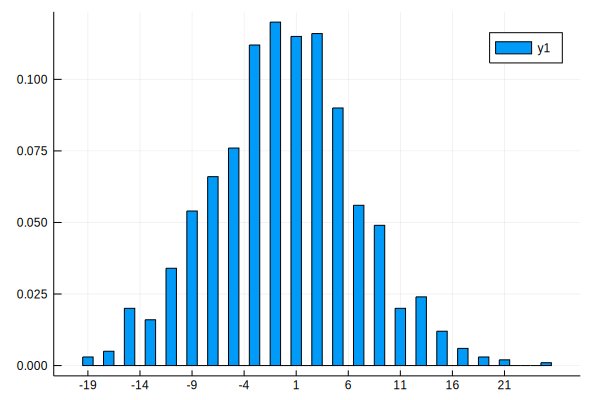

In [54]:
t = 50
cajas = collect((minimum(pasos[:,t])-.5):maximum(pasos[:,t])+.5)
histogram(pasos[:,t], bins = cajas, xticks=minimum(pasos[:,t]):5:maximum(pasos[:,t]),normalized =true)